# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.2.0 


# Equalização de histograma

In [92]:
rintin = cv2.imread("RinTinTin.jpg")

In [93]:
rintin.shape

(240L, 320L, 3L)

In [94]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [95]:
rintin_gray.shape

(240L, 320L)

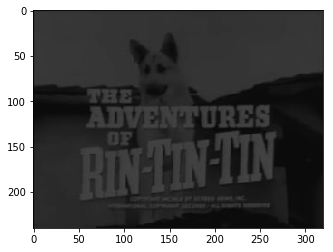

In [96]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

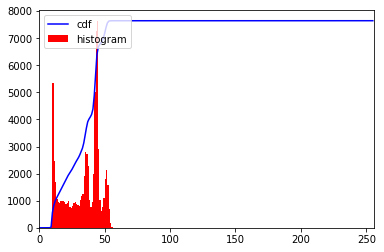

In [97]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1) O Histograma fornecido não aproveita bem a faixa de cores pois, ele está limitado a 50 tons apenas e o computador interpreta no máximo 255.

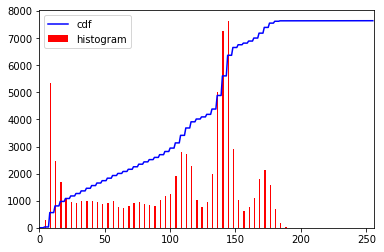

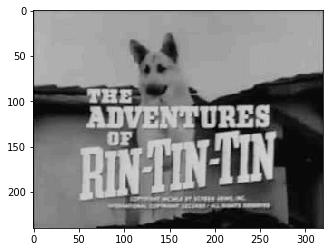

In [98]:
rintin_gray -= rintin_gray.min()
rintin_gray *=(255/50) 

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256]) 

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
h=plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


1)

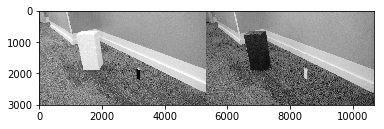

In [108]:
caixas = cv2.imread("hall_box_battery1.jpg")
caixas_rgb = cv2.cvtColor(caixas, cv2.COLOR_BGR2RGB)

caixar = caixas_rgb[:,:,0]
caixab = caixas_rgb[:,:,2]

redblue = np.hstack((caixar,caixab))

plt.imshow(redblue, cmap='Greys_r')


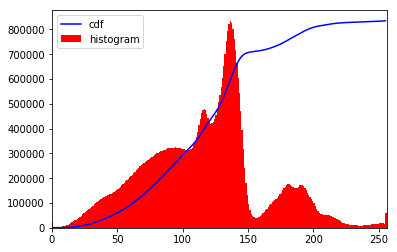

In [110]:

hist,bins = np.histogram(caixas_rgb.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
h=plt.hist(caixas_rgb.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


Pela imagem conseguimos identificar as cores, já pelo histograma não consegumos identificar as caixas.

2)

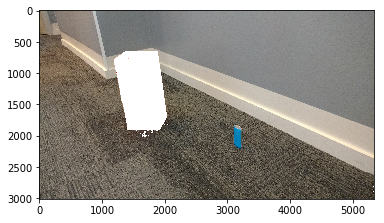

In [119]:
caixas_hsv = cv2.cvtColor(caixas, cv2.COLOR_BGR2HSV)

mascara = np.array([255,255,255])
vermelho_menor = np.array([0,100, 100])
vermelho_maior = np.array([8, 255, 255])

mascara = cv2.inRange(caixas_hsv, vermelho_menor, vermelho_maior)
caixas_rgb[mascara == 255] =[0,0,0]
    
plot_final = cv2.bitwise_not(caixas_rgb,caixas_rgb, mask= mascara)


plt.imshow(plot_final)